In [208]:
import requests
import pandas as pd
import  datetime
import matplotlib.pyplot as plt

In [209]:
begin = datetime.date(2020, 1, 1)
end = datetime.date(2020, 4, 3)

graphdatas = []

for i in range((end - begin).days + 1):
    day = begin + datetime.timedelta(days=i)
    date = str(day)
    url = "http://datainterface3.eastmoney.com//EM_DataCenter_V3/api/LHBJGTJ/GetHBJGTJ?tkn=eastmoney&code=&mkt=0&dateNum=&startDateTime=" \
        + date + "&endDateTime=" \
        + date + "&sortfield=PBuy&sortdirec=1&pageNum=1&pageSize=&cfg=lhbjgtj"
    page = requests.get(url)
    content = eval(page.text)
    stockdata = content['Data'][0]
    columns = [name for name in stockdata['FieldName'].split(',')]
    SplitSymbol = stockdata['SplitSymbol']
    data = [stock.split(SplitSymbol) for stock in stockdata['Data']]  
    stocks = pd.DataFrame(data, columns=columns)
    stocks[['BMoney','SMoney']] = stocks[['BMoney','SMoney']].astype(float)
    graphdata = {'date':date, 'BMoney':stocks['BMoney'].sum(), 'SMoney':stocks['SMoney'].sum()}
    graphdatas.append(graphdata)    

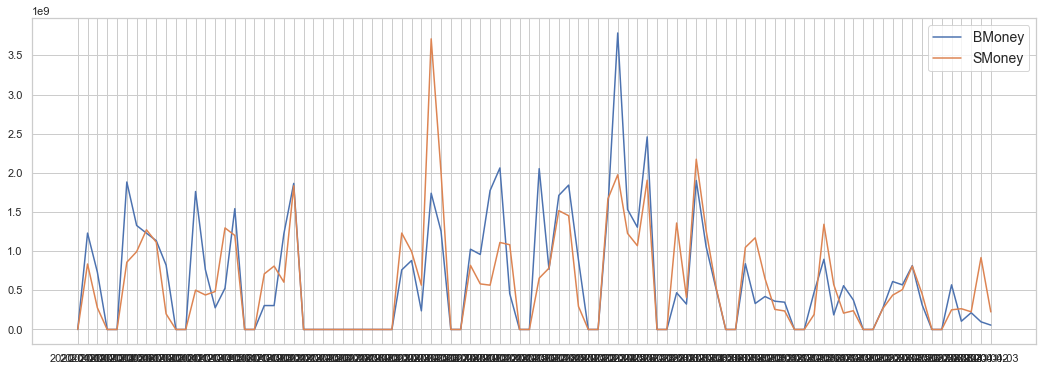

In [210]:
graphdatas = pd.DataFrame(graphdatas)
plt.figure(figsize=(18, 6))
plt.plot(graphdatas['date'], graphdatas['BMoney'], label='BMoney')
plt.plot(graphdatas['date'], graphdatas['SMoney'], label='SMoney')
plt.legend(fontsize=14);